# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import future

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [60]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

/home/ahmetkuzubasli/assignment1/cs231n/features.py:121: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy].T


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [61]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [4e-8, 5e-8, 6e-8]
regularization_strengths = [4e5, 5e5, 6e5]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
import time
tic = time.time() 
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, batch_size=200, reg=reg, num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        acc_val = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
            best_reg = reg
            best_lr = lr
        
pass
toc = time.time()
print('That took %fs' % (toc - tic))
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %2.e reg %2.e train accuracy: %f val accuracy: %f GAP: %f' % (
                lr, reg, train_accuracy, val_accuracy, train_accuracy - val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 300.059280
iteration 100 / 1500: loss 20.560215
iteration 200 / 1500: loss 9.459165
iteration 300 / 1500: loss 9.018104
iteration 400 / 1500: loss 9.000630
iteration 500 / 1500: loss 8.999953
iteration 600 / 1500: loss 8.999897
iteration 700 / 1500: loss 8.999896
iteration 800 / 1500: loss 8.999908
iteration 900 / 1500: loss 8.999907
iteration 1000 / 1500: loss 8.999910
iteration 1100 / 1500: loss 8.999892
iteration 1200 / 1500: loss 8.999905
iteration 1300 / 1500: loss 8.999906
iteration 1400 / 1500: loss 8.999906
iteration 0 / 1500: loss 379.236901
iteration 100 / 1500: loss 15.510709
iteration 200 / 1500: loss 9.114493
iteration 300 / 1500: loss 9.001958
iteration 400 / 1500: loss 8.999958
iteration 500 / 1500: loss 8.999934
iteration 600 / 1500: loss 8.999924
iteration 700 / 1500: loss 8.999929
iteration 800 / 1500: loss 8.999928
iteration 900 / 1500: loss 8.999942
iteration 1000 / 1500: loss 8.999937
iteration 1100 / 1500: loss 8.999926
iteration 1200 / 15

In [62]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.425


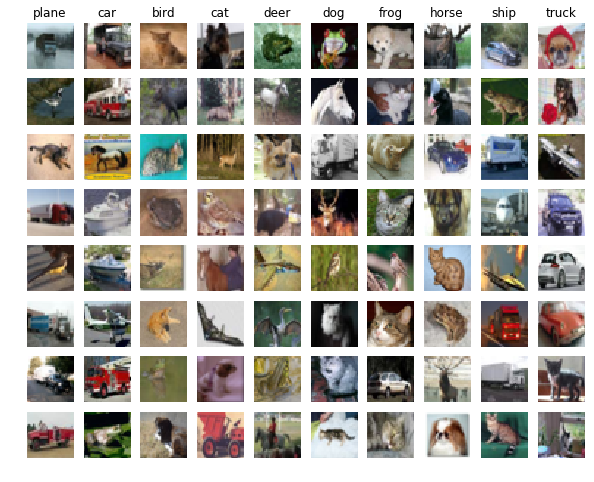

In [63]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [64]:
print(X_train_feats.shape)

(49000, 155)


In [120]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
num_classes = 10


best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

import time

best_net = None # store the best model into this 
best_val = -1
hidden_size = [500]
results = {}
number_of_iters = [5000]
learning_rates = [0.6] # np.logspace(-10, 10, 8) #-10, -9, -8, -7, -6, -5, -4
regularization_strengths = [3e-3]
batch_sizes = [200]

for hid_size in hidden_size:
    hidden_size = hid_size
    for reg in regularization_strengths:
        for lr in learning_rates:
            for num_iter in number_of_iters:
                for bs in batch_sizes:
                    tic = time.time()
                    net = TwoLayerNet(input_size, hidden_size, num_classes)
                    print( "hid_size %d / lr %.2E / reg %.2e / num_iter %d / batch_s %d" % (hid_size, lr, reg, num_iter, bs))
                    training_results = net.train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=num_iter, batch_size=bs,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg= reg, verbose=True)
                    val_acc = (net.predict(X_val_feats) == y_val).mean()
                    toc = time.time()
                    print('That took %fs' % (toc - tic))
                    est_time = toc - tic
                    results[(hid_size, lr, reg, num_iter, bs)] = (val_acc, est_time)
                    if val_acc > best_val:
                        best_val = val_acc
                        best_net = net
                        best_stats = training_results
                        best_hid_size = hid_size
                        best_reg = reg
                        best_lr = lr
                        best_num_iter = num_iter
                        best_bs = bs
   
pass



pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for hid_size, lr, reg, num_iter, bs in sorted(results):
    val_accuracy, est_time = results[(hid_size, lr, reg, num_iter, bs)]
    print('hid_size %d / lr %.2E / reg %.2e / num_iter %d / batch_s %d - val accuracy: %f - time: %fs' % (
                hid_size, lr, reg, num_iter, bs, val_accuracy, est_time))
    
print('BEST val accuracy: %f with hid_size %d / lr %.2E / reg %.2e / num_iter %d / batch_s %d' % 
          (best_val, best_hid_size, best_lr, best_reg, best_num_iter, best_bs))

hid_size 500 / lr 6.00E-01 / reg 3.00e-03 / num_iter 5000 / batch_s 200
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.513766
iteration 200 / 5000: loss 1.507777
iteration 300 / 5000: loss 1.387939
iteration 400 / 5000: loss 1.425455
iteration 500 / 5000: loss 1.406858
iteration 600 / 5000: loss 1.293479
iteration 700 / 5000: loss 1.197916
iteration 800 / 5000: loss 1.287588
iteration 900 / 5000: loss 1.216596
iteration 1000 / 5000: loss 1.285810
iteration 1100 / 5000: loss 1.358969
iteration 1200 / 5000: loss 1.308837
iteration 1300 / 5000: loss 1.234354
iteration 1400 / 5000: loss 1.233878
iteration 1500 / 5000: loss 1.207221
iteration 1600 / 5000: loss 1.255080
iteration 1700 / 5000: loss 1.292969
iteration 1800 / 5000: loss 1.179286
iteration 1900 / 5000: loss 1.238132
iteration 2000 / 5000: loss 1.067975
iteration 2100 / 5000: loss 1.213880
iteration 2200 / 5000: loss 1.164079
iteration 2300 / 5000: loss 1.055449
iteration 2400 / 5000: loss 1.139345
iteration 2500 

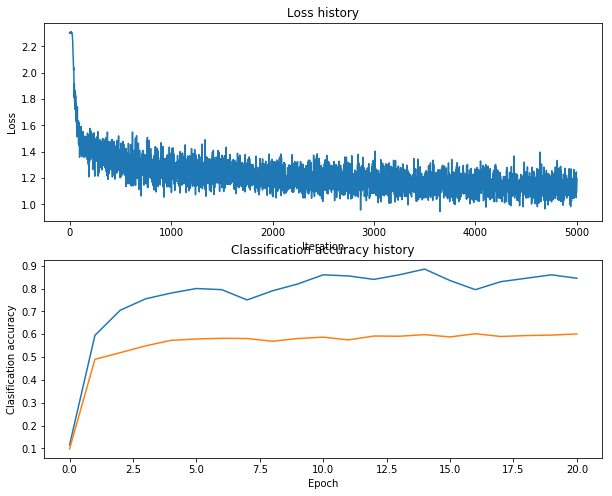

In [121]:
# Plot loss and Accuracy
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

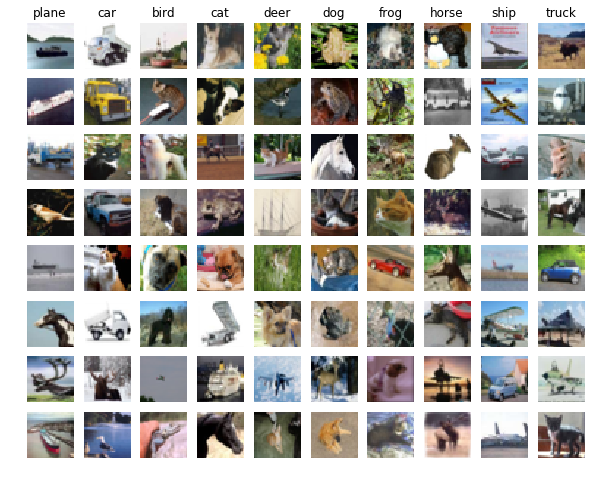

In [116]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
y_test_pred = best_net.predict(X_test_feats)
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

In [122]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.584


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!